# Summary

An LSTM model was used to process data from an electronic nose to discriminate between the gaseous signatures of banana, wine and background (neither banana nor wine) with an accuracy of over **<font color='3bd80d'>99%</font>** on a test dataset. A significant improvement on the 81% accuracy achieved by **Huerta et al (2016)** ([preprint on arXiv](https://arxiv.org/pdf/1608.01719.pdf)), who provided the dataset to the public. 

# Quick overview of gas discrimination

## Gas Discrimination
Gas discrimination task involves identifying and differenting various gases or gasoues stimuli. There are simpler examples like detecting carbon monoxide in indoor air, and hydrogen sulphide in a mining site, and there more challenging ones like differentiating the gasoues stimuli of a pool of diesel fuel from that of a pool of gasoline (which can be important as the latter is much more flammable than the former as it has a much lower flash point). Such gas discrimination tasks can be tackled using an **electronic nose**.

<img src="images/diesel_vs_gasoline.png" style="width: 400px;"/>
<center><i><b>Gasoline (right) is much more flammable than diesel fuel (left). Each produces a rich mixture of hydrocarbon gases that gives it a distinct gaseous signature and also its scents.</b></i></center>

This subfield rapid chemical analysis is also beginning to intersect with robotics, as electronic noses are becoming vital instruments for robots to have, especially those deployed in hazardous environments. Traditional techniques of discriminating gases, like gas chromatography, often take hours to run and are therefore not suitable (Fan et al 2019).
 
Accurate discrimination of gases in a quick, cost-efficient manner remains a  challenging problem that's still actively being researched from multiple angles (lots of papers every year), like developing better sensors, better pattern recognition algorithms, expanding our understanding of the physical processes involved in the transduction of chemical signatures to electrical signals, etc.

## Electronic nose
An electronic nose setup is an array of gas sensors, often with mix of cross sensitive and selective sensors, that are used to identify chemical signatures that could be made up of an assorted mixture of gases. Cross sensitive sensors respond to multiple target gases while strictly selective sensors respond to one target gas (often very hard to achieve).

Electronic noses are useful instruments for human monitoring purposes, environmental analysis, atmospheric hazard prevention, breath analysis, etc.

<img src="images/an_electronic_nose_setup.jpg" style="width: 400px;"/>
<center><i><b>An electronic nose setup that includes 8 metal-oxide gas sensors (Huerta et al 2016).</b></i></center>



### Metal-oxide (MOX) gas sensors

Metal-oxide (MOX) sensors are one of the most common type of gas sensors. They cheap to make, easy to use and relatively very stable.

When a target gas comes in contact with the sensing surface of a MOX gas sensor, the oxygen already [adsorbed](https://en.wikipedia.org/wiki/Adsorption) to the sensing surface reacts with the target gas and causes a change in the electrical resistance of the sensor (a.k.a. the gas sensor response). This resistance is recorded and then used to determine the concentration of the target gas using a sensitivity characteristics chart (a chart relating resistance to concentration of the target gas).

## Sensing chemical signatures using an electronic nose

Unlike individual sensors that can be easily calibrated by following established standards (e.g. manufacturer's instructions), gas sensor arrays often require multivariate models to correctly map the sensor responses (electrical resistance values) to the gas concentration or some other desired property, e.g. identity of a gaseous stimulus.

The need for data processing and models often make calibrating electronic noses challeneging. Moreover, gas sensor responses are highly sensitive to temperature and humidity; and humidity itself varies with temperature (humidity decreases as temperature rises even when the water content of air or the ambient gas is unchanged), further complicating the relationship. 

To further complicate the challenge, gas sensors are prone to drift, which is a change of their characteristics over time even when under constant physical and chemical conditions (Holmberg et al 1997). All these makes it important for the model that interprets the readings of an electronic nose to be robust and agile.

# References

Fan, H., Hernandez Bennetts, V., Schaffernicht, E., & Lilienthal, A. (2019). Towards Gas Discrimination and Mapping in Emergency Response Scenarios Using a Mobile Robot with an Electronic Nose. *Sensors*. https://doi.org/10.3390/s19030685

Holmberg, M., Davide, F., Di Natale, C., D'Amico, A., Winquist, F. & Lundström, I. (1997). Drift counteraction in odour recognition applications: life long calibration method. *Sensors and Actuators B: Chemical*: https://doi.org/10.1016/j.chemolab.2016.07.004.

Huerta, R., Mosqueiro, T., Fonollosa, J., Rulkov, N., & Rodriguez-Lujan, I. (2016). Online decorrelation of humidity and temperature in chemical sensors for continuous monitoring. *Chemometrics And Intelligent Laboratory Systems*: https://doi.org/10.1016/j.chemolab.2016.07.004

# Introduction

This mini-project is inspired by the work done by **Huerta et al (2016)** ([preprint on arXiv](https://arxiv.org/pdf/1608.01719.pdf)).

They demonstrated a method to improve gas discrimination by first filtering out the effects of environmental humidity and temperature from the gas sensor responses and using that to train an inhibitory support vector machine (I-SVM) that performs the discrimination.

The discrimination task was to use an electronic nose made of 8 metal-oxide gas sensors to **differentiate three different gaseous stimili: wine, banana, and background (i.e. neither banana nor wine).** Their paper excellently describes it as follows:

> Rather than using the particular chemical signatures of compounds from bananas and wines, our goal is to construct a model that learns to predict presence of banana/wine based on the multivariate response of the sensors. The chemical signature of bananas changes, for instance, as they ripen, and wine's signature depends on alcohol content (ethanol), origin of the grape, among other factors. Thus, our approach attempts at building a model that does not rely on wine type and banana ripeness.

They used a theory-based model that exploits the fact that sensor responses depend on the changes of energy bands of the sensing surface, and the changes in the energy bands in turn arise from variations in environmental humidity and temperature. 

Their theory-based, energy band model computes resistance values based on just changes in environmental humidity and temperature, and by subtracting this output from the actual resistance values measured by the electronic nose, they filter out the impact of changes in environmental humidity and temperature from the sensor readings. 

By using these filtered signals, instead of the original signals, as an input to an I-SVM model, they were able to improve the perfomance of the gas discrimination task from 71.1% to 80.9%.

Upon reading their paper, I wondered in what ways can this be improved?

## Dataset

The dataset was generated by a wireless electronic nose used to monitor the indoor air for two years in the residence of one of the authors, and it collected data continuously during 537 days with a sampling rate of 1 datapoint per second. A portion of the collected data, which runs from 04-Jul-2015 to 17-Sep-2015, was publicly released on the UCI Machine Learning repository.

Link: http://archive.ics.uci.edu/ml/datasets/Gas+sensors+for+home+activity+monitoring

### Overview of dataset
The data includes two dat files. One is the metadata and the other the main data.

Metadata (`HT_Sensor_metadata.dat`): Has 5 fields (columns): 
* 1 for ID
* 1 for date
* 1 for class of stimulation
* 1 for start-time of stimulation
* 1 for duration of stimulation

Dataset (`HT_Sensor_dataset.dat`): Has 12 fields (columns):
* 1 for ID
* 1 for time
* 8 for sensor responses (resistances)
* 1 for ambient temperature
* 1 for ambient humidity

Each ID in the dataset represents a period of stimulation with a specific stimulus (wine or banana or background). There are 36 stimulations with wine, 33 with banana and 31 of background activity, for a total of 100. However, one of the stimulations was not recorded (see "Messy dataset" below), so only 99.

Each span of stimulation is preceded by 1 hour of recording without the stimulus and followed by another hour of recording without the stimulus. However, this was just the intention and the dataset does not actually reflect this for many of the stimulations (see "Messy dataset" below).

In all, there are 928,991 records (datapoints) distributed unevenly among 99 IDs.

# Challenges and path forward

## Limitations of SVM

For their SVM model, the data was resampled to 1 datapoint per minute and a sequence of 10 minutes (10 timesteps per sequence) was fed into the SVM. An SVM model treats each timestep as a separate feature, and this has a number of disadvantages: 
* The trainable parameters for each timestep is not shared across other timesteps, meaning that the temporal dependencies in the data are not modelled explicitly. 
* The length of the sequence that the model can accept is fixed because they are treated as features.
* The capability of SVM to extract useful features is 

One way to rectify these shortcomings is to use a model that specifically structured to handle temporal dependencies explicitly. The timesteps are not treated as separate features and the same parameter is associated with all the timesteps in the sequence. One such model is a long short-term memory (LSTM) neural network, which what I used.

On weakness of using a neural network is that interpreting the trained model becomes a Herculean task. But interppretability was neither a major focus of the paper nor the gas discrimination task.

## Messy dataset 
The data was intended to have a steady frequency of 1 Hz (1-second periodicity). But in practice, there were failures in the sensors due to number of reasons as the paper explained. Sometimes the electronic nose stopped transmitting due issues in the wireless connectivity, or the sensors were displaced from their location and stopped working. 


The size of the timesteps are all over the place. Everything from the two different readings at the same exact time to gaps that are minutes long. Indeed, as the paper describes it, the dataset "represents a wide variety of events present in home monitoring scenarios." It's quite very messy.

My approach to tackling this problem data is to first thoroughly characterize everywhere we have anomaly in the data, and then decide how to handle each category of anomalies. Even though the dataset was intended to be equidistant, it will be initially treated as a nonequidistant time series.

# Project: Rapid Gas Discrimination Using An Electronic Nose With An LSTM Model

Import all needed packages, including the custom-made package `support_tools`.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorboard as tb
import os
from sklearn import preprocessing, model_selection

from support_tools import explore, prepare

Load the data

In [2]:
raw_metadata = pd.read_table("HT_Sensor_UCI_Dataset\\HT_Sensor_metadata.dat")

raw_data = pd.read_table("HT_Sensor_UCI_Dataset\\HT_Sensor_dataset.dat", 
                         sep="\s\s", engine='python')


In [3]:
display(raw_metadata.head())
display(raw_metadata.tail())

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


,id,date,class,t0,dt
95,95,09-11-15,background,12.55,0.57
96,96,09-14-15,background,13.37,0.94
97,97,09-15-15,background,14.25,0.72
98,98,09-16-15,background,14.41,0.71
99,99,09-17-15,background,11.93,0.68


In [4]:
display(raw_data.head())
display(raw_data.tail())

,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


,id,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
928986,99,1.675182,12.6224,10.5805,10.7432,12.1775,12.6498,17.2926,6.20449,7.05966,27.7282,54.1532
928987,99,1.675460,12.6236,10.5796,10.7436,12.1780,12.6511,17.2918,6.20444,7.05980,27.7312,54.1423
928988,99,1.675738,12.6244,10.5795,10.7437,12.1782,12.6524,17.2907,6.20451,7.05967,27.7339,54.1324
928989,99,1.676016,12.6243,10.5797,10.7440,12.1784,12.6532,17.2904,6.20468,7.05969,27.7364,54.1235
928990,99,1.676304,12.6248,10.5791,10.7440,12.1784,12.6539,17.2895,6.20461,7.05944,27.7385,54.1154


Convert time from hours to a different unit. We go with seconds.

In [5]:
unit_time_per_hour = 3600 # 3600 secs per hour, 60 min per hour.

raw_data["time"] *= unit_time_per_hour
raw_metadata["dt"] *= unit_time_per_hour

As already mentioned in the section "Messy data" above, what was intended for the data is not always what is contained in the dataset. The metadata contains what was intended. We need to check it against the actual data to better understand where there are discrepancies.

Let's identify all stimulations for which no readings were recorded for whatever reason. These are IDs listed in the metadata for which no datapoints in the dataset are associated with.

In [6]:
for id_ in raw_metadata.loc[:, "id"]:
    if not id_ in raw_data.loc[:, "id"].unique():
        print("No readings were recorded for stimulation #"+str(id_))

No readings were recorded for stimulation #95


Let's check out more intention vs reality. We will verify the following intentions:

* Each stimulation is supposed to be preceeded by 3600 seconds (1 hour) of readings. All readings prior to the start of stimulation have a negative timestamp.

* Each stimulation is supposed to be followed by 3600 seconds (1 hour) of readings. The duration of each stimulation is provided in the metadata, so any ID in the dataset that has less than 3600 seconds of readings is missing some data.

In [7]:
# Compute the actual duration of each stimulation (excludes the pre-stimulation readings, 
# but includes any post-stim readings).

actual_durations = []
start_times = []
last_negative_times = []

all_ids = raw_data.loc[:, "id"].unique()

for id_ in all_ids:
    data_id=raw_data.loc[(raw_data["id"]==id_), :]
    start_time = data_id.iloc[0, data_id.columns.get_loc("time")]
    last_negative_time = data_id.loc[data_id["time"]<0, "time"].max()
    positive_time_mask = data_id["time"]>=0
    data_id_positive_time = data_id.loc[positive_time_mask, :]
    pos_time_duration = (data_id["time"].max())
    actual_durations.append(pos_time_duration)
    start_times.append(start_time)
    last_negative_times.append(last_negative_time)

In [8]:
actual_intended_stim_durations = np.array([all_ids, actual_durations, 
                                             raw_metadata.iloc[all_ids, raw_metadata.columns.get_loc("dt")]]).T
actual_intended_stim_durations = pd.DataFrame(actual_intended_stim_durations, 
                                                  columns=["id", "actual_duration", "duration_of_stimulation"])
actual_intended_stim_durations["difference"] = actual_intended_stim_durations["actual_duration"]\
    - actual_intended_stim_durations["duration_of_stimulation"]

all_start_times = pd.DataFrame (np.array([all_ids, start_times]).T, columns=["id","start_times"])

all_last_negative_times = pd.DataFrame(np.array([all_ids, last_negative_times]).T, 
                                       columns=["id","last_negative_timestamp"])

Let's see the results!

There should be roughly 3600 seconds difference between the duration of stimulation and the total duration from start of stimulation to the end of recording. Any deviation points to an anomaly.

In [9]:
mask = (actual_intended_stim_durations["difference"]<3599) | (actual_intended_stim_durations["difference"]>3601)
num_anomalies = len(actual_intended_stim_durations.loc[mask,:].index)
print("There are "+str(num_anomalies)+" stimulations with anomalies.")

# Uncomment the line below to see the anomolous IDs.

# display(actual_intended_stim_durations.loc[mask,:])

There are 42 stimulations with anomalies.


Let's see the stimulations that lack a complete record of the 1-hour pre-exposure.

In [10]:
mask = all_start_times["start_times"] > -3599

num_incomp_preexposure = len(all_start_times.loc[mask, :].index)
print("There are "+str(num_incomp_preexposure)+" stimulations that lack a complete record of the 1-hour pre-exposure.")


# Uncomment the line below to see these IDs.

display(all_start_times.loc[mask, :])

There are 5 stimulations that lack a complete record of the 1-hour pre-exposure.


,id,start_times
4,4.0,-75.0204
11,11.0,-2978.7552
24,24.0,-1935.5112
30,30.0,-3520.3716
98,99.0,-3598.9740


There are clearly a lot anomalies with the pre-stimulation and post-stimulation recordings. Many of them are not 1 hour long, or are even missing entirely. So, we will proceed to discard them and only focus on the periods of stimulations.

Isolate only periods of active stimulation as specified in the metadata:

In [11]:
all_active_stims = []
for id_ in raw_data.loc[:, "id"].unique():
    
    # isolate a single stretch of stimulation.
    mask_id = (raw_data["id"]==id_)
    stimulation = raw_data.loc[mask_id, :]
    
    # get duration of active exposure.
    dur_active = raw_metadata.loc[(raw_metadata["id"]==id_), "dt"].iat[0]
    
    # select only data of active exposure (from time 0 till end of duration of active exposure).
    active_stim_time_mask = (stimulation["time"]>=0) & (stimulation["time"]<dur_active) 
    active_stimulation = stimulation.loc[active_stim_time_mask, :]
    all_active_stims.append(active_stimulation)
    
active_data = pd.concat(all_active_stims)

Let's scale the data to a range of 0 to 1 in anticipation of training. We won't scale time or id.

In [12]:
feature_scaler = prepare.MinMaxRescaler()
min_active_data = active_data.iloc[:, 2:].min(axis=0).to_numpy().reshape(1,-1)
max_active_data = active_data.iloc[:, 2:].max(axis=0).to_numpy().reshape(1,-1)

active_data.iloc[:, 2:] = feature_scaler.rescale(active_data.iloc[:, 2:], [min_active_data, max_active_data])


One thing is very clear so far. Enough datapoints that are missing to just simply ignore the issue. We need a more comprehensive approach to better identify these anomalies.

We know that the periodicity of the dataset is supposed to be 1 second. Therefore anywhere the time gap between a datapoint and the next (let's call this the ***local periodicity*** of that datapoint) is considerably different from 1 second, we will know for certain that something went wrong there with the readings.

Get the local periodicity of each datapoint (i.e. time difference between each datapoint and the next). 

In [13]:
all_local_periods = explore.local_periodicity(df=active_data)
all_local_periods.head()

,id,time,local_periodicity
3429,0,0.0756,1.0368
3430,0,1.1124,1.0008
3431,0,2.1132,1.0008
3432,0,3.1140,1.0044
3433,0,4.1184,1.0008


How many datapoints have local periodicities that deviate considerably from 1 second.

In [14]:
mask = (all_local_periods["local_periodicity"] < 0.999) | (all_local_periods["local_periodicity"] > 1.001)

num1 = len(all_local_periods.loc[mask,:].index)
num2 = len(active_data.index)
print("There are {} datapoints out of {} with local periodicity greater than 1 second.".format(num1, num2))

There are 51641 datapoints out of 253713 with local periodicity greater than 1 second.


That's a huge chunk of our dataset with local periodicities that deviate from 1 second. But let's loosen the bound and assume that every gap that falls within 0.9 to 1.1 second is approximately 1 second.

In [15]:
mask = (all_local_periods["local_periodicity"] < 0.9) | (all_local_periods["local_periodicity"] > 1.1)

num1 = len(all_local_periods.loc[mask,:].index)
num2 = len(active_data.index)
print("There are {} datapoints out of {} with local periodicity greater than 1 second.".format(num1, num2))

There are 1064 datapoints out of 253713 with local periodicity greater than 1 second.


That's a lot better. But how big are these gaps? Let's get the average local periodicity among these that are greater than 1 second.

In [16]:
mask = (all_local_periods["local_periodicity"] > 1.1)

num1 = all_local_periods.loc[mask,"local_periodicity"].mean()
print("The average local periodicity greater than 1 second is {:.2f} seconds.".format(num1))

The average local periodicity greater than 1 second is 14.72 seconds.


How many gaps very big, e.g. bigger than 120 seconds?

In [17]:
mask = (all_local_periods["local_periodicity"] > 120)

num1 = len(all_local_periods.loc[mask,:].index)
num2 = len(active_data.index)
print("There are {} datapoints out of {} with local periodicity greater than 120 seconds.".format(num1, num2))

There are 27 datapoints out of 253713 with local periodicity greater than 120 seconds.


Let's find and plot one of the IDs with large gaps

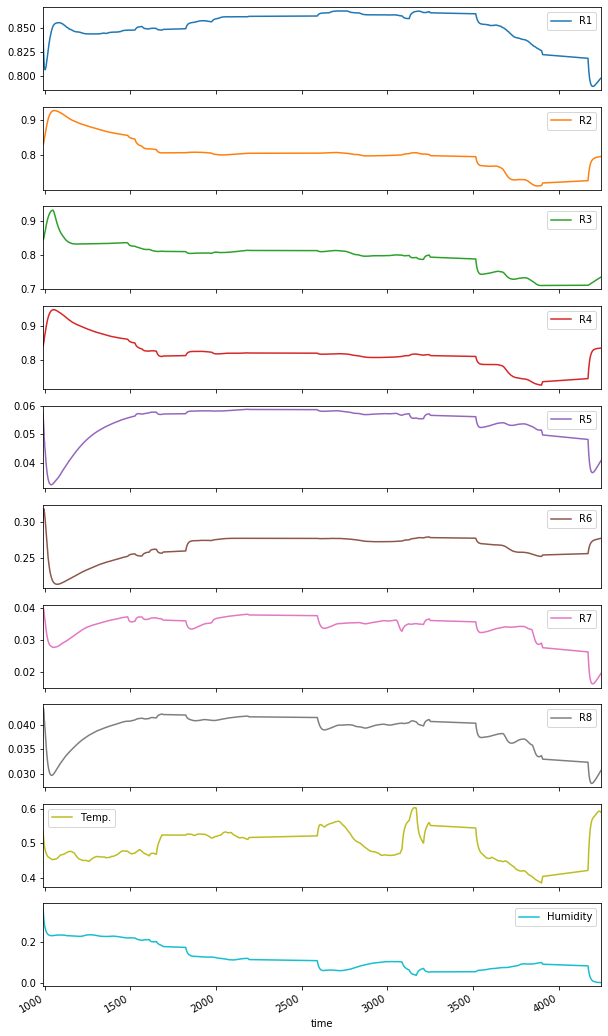

In [18]:
mask = (all_local_periods["local_periodicity"] > 120)

# ID with most number of large gaps.
id_most_lgaps = all_local_periods.loc[mask,"id"].mode().iat[0]

axes = active_data.loc[(active_data["id"]==id_most_lgaps),:].plot(x="time", y = active_data.columns[2:], 
                                                 sharex=True, subplots=True, figsize=(10, 20))

We can see the sudden straight lines that occur at the same place in all the plots above, and those are where the large gaps occur. Let's compare with another ID that has no large gaps.

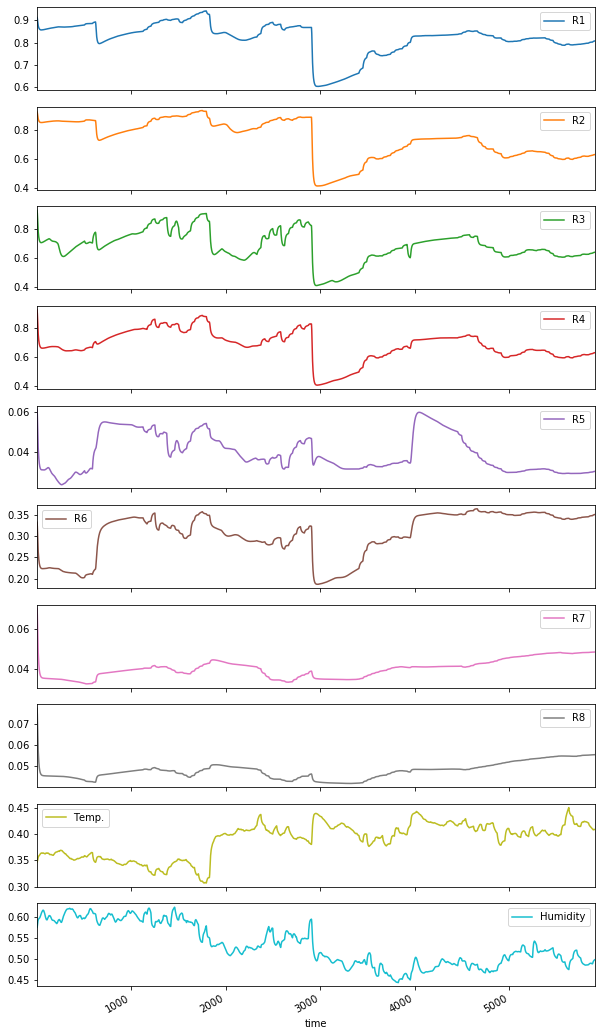

In [19]:
mask = (all_local_periods["local_periodicity"] > 0.9) & (all_local_periods["local_periodicity"] < 1.1)

id_min_gaps = all_local_periods.loc[mask,"id"].iloc[0]
axes = active_data.loc[(active_data["id"]==id_min_gaps),:].plot(x="time", y = active_data.columns[2:], 
                                                 sharex=True, subplots=True, figsize=(10, 20))

Now we know there are a few large, anomalous gaps in our dataset, and a much greater number of small gaps. We need to establish a way to handle these gaps.

Small gaps: We can simply ignore them, because we intend to resmaple the data to a lower frequency before training. The resampling involves averaging several datapoints and using the resulting value as the new sample.

Big gaps: We must exclude them. The two set of plots above does not give leave confident with simply using linear interpolation to fill in the missing gaps. We can't have a sequence with several minutes of gap between one step and the next, while the rest of the local periodicities are close to 1 second. This leads to the idea of contiguous spans in our dataset.

A **contiguous spans** is simply a segment of our dataset in which all the time gaps (local periodicities) are less than a given threshold value (`largest_acceptable_gap`). This threshold value draws the line between small gaps that will be included and averaged out, and big gaps that will be bypassed.

Let's set the largest acceptable gap to 10 seconds. That is, we identify all the segments (spans) of data within each ID where there are no gaps larger than 10 seconds.

In [20]:
largest_acceptable_gap=10
all_contiguous_spans = explore.get_all_contiguous_spans(active_data, largest_acceptable_gap)

display(all_contiguous_spans)

,id,start_index,end_index,start_time,end_time,duration
3429,0,3429,9270,0.0756,5903.1972,5903.1216
16385,1,16385,18309,0.4392,1943.5464,1943.1072
25300,2,25300,27653,0.4860,2375.1684,2374.6824
34798,3,34798,35143,0.7164,354.1932,353.4768
35144,3,35144,37234,484.9704,2591.9748,2107.0044
...,...,...,...,...,...,...
883304,94,883304,886126,0.4680,2843.4168,2842.9488
893251,96,893251,896606,1.0332,3383.8344,3382.8012
903599,97,903599,906174,0.2916,2591.3808,2591.0892
913329,98,913329,915867,0.4428,2555.0028,2554.5600


Using information of all the contiguous spans, we resample our data into an equidistant time series with periodicity of 20 seconds (0.05 Hz). Huerta et al (2016) found that as periodicity increases the predictive power of their energy band model declined, so they adviced against using periodicity higher than 120 seconds. They used 60 seconds. Therefore our choice of 20-second periodicity seems very safe.

Eventually, we will fold our data into a 3D array of sequences, where each sequence is 10 minutes (600 seconds) long. We are using the same 10 minutes used by Huerta et al (2016) for their SVM model. This means that any contiguous span that cannot produce a full sequence is not suitable and cannot be used for training, and therefore there is no benefit in resmapling such a contiguous span. 

In [21]:

resampled_periodicity = 20
duration_seq = 600
seq_len=duration_seq//resampled_periodicity

# OR:
# seq_len=30
# duration_seq = seq_len * resampled_periodicity

all_resampled_suitable_spans = dict()

all_ids = active_data.loc[:, "id"].unique()
for i, id_ in enumerate(all_ids):
    # isolate a single stretch of active exposure to stimuli.
    mask_id = (active_data["id"]==id_)
    active_stimulation = active_data.loc[mask_id, :]
     
    # Get the start indices of all suitable contiguous spans.
    # Suitable spans are those that can produce at least one sequence.
    
    mask_suitable_spans = (all_contiguous_spans["id"]==id_) & \
        (all_contiguous_spans["duration"]>duration_seq)
    
    suitable_spans_range_ind = all_contiguous_spans.loc[mask_suitable_spans.to_numpy(), 
                                                        ["start_index", "end_index"]]
    
    # resample each suitable contiguous span.
    
    all_resampled_suitable_spans[id_] = list()
    for start_ind, end_ind in suitable_spans_range_ind.itertuples(index=False):
        suitable_span = active_stimulation.loc[start_ind:end_ind, :]

        resampled_suitable_span, _ = prepare.segment_and_resample(suitable_span.to_numpy(), 
                                            resampled_periodicity, 
                                            index_time_field=suitable_span.columns.get_loc("time"),
                                            enforce_contiguity=True)
        
        all_resampled_suitable_spans[id_].append(resampled_suitable_span)

In [22]:
# This is not really needed for latter operations.

# Consolidate the resmapled spans (optional).
all_resampled_active_stim = []
ids_not_used = []
all_ids = active_data.loc[:, "id"].unique()
for i, id_ in enumerate(all_ids):
    if len(all_resampled_suitable_spans[id_]) > 0:      
        resampled_active_stim = np.array(all_resampled_suitable_spans[id_][0])
        all_resampled_active_stim.append(resampled_active_stim)
    else: # if empty
        ids_not_used.append(id_)
resampled_active_data = np.concatenate(all_resampled_active_stim)
print(resampled_active_data)

[[0.00000000e+00 1.01896000e+01 8.95700733e-01 ... 6.80085195e-02
  3.50926152e-01 5.84161732e-01]
 [0.00000000e+00 3.01120200e+01 8.62093283e-01 ... 4.96129225e-02
  3.59842657e-01 5.97773217e-01]
 [0.00000000e+00 5.02795800e+01 8.57030526e-01 ... 4.61782106e-02
  3.63658753e-01 6.08487890e-01]
 ...
 [9.90000000e+01 2.40836814e+03 8.91033404e-01 ... 5.82400938e-02
  5.37058342e-01 4.12051365e-01]
 [9.90000000e+01 2.42851932e+03 8.90125117e-01 ... 5.82200570e-02
  5.24502210e-01 4.18413548e-01]
 [9.90000000e+01 2.44341051e+03 8.89401070e-01 ... 5.81773776e-02
  5.27472910e-01 4.16285402e-01]]


All the data suitable for training is in `all_resampled_suitable_spans`. Next step is to fold it into a 3D array of sequences that [TensorFlow expects](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/layers/RNN#used-in-the-notebooks).

In [23]:
# fold all the suitable resampled spans into the required shape for training.

all_folded_spans=[]
all_onehots=[]

onehot_encoder = preprocessing.OneHotEncoder()
onehot_encoder.fit(raw_metadata["class"].unique().reshape(-1, 1))

for id_ in all_resampled_suitable_spans.keys():
    time_field_ind = 0
    for resampled_suitable_span in all_resampled_suitable_spans[id_]:
        # drop the id and time columns.
        temp = np.delete(resampled_suitable_span, [0, 1], axis = 1)
        folded_span = prepare.fold_into_overlapping_sequences(temp,
                                        seq_len, 
                                        fields_to_zero_tare = None)
        
        stimulation_class_mask = (raw_metadata["id"]==id_)
        stimulation_class = raw_metadata.loc[stimulation_class_mask, "class"]
        stim_classes = np.repeat(stimulation_class.to_numpy(), folded_span.shape[0]).reshape(-1, 1)
        all_folded_spans.append(folded_span)

        all_onehots.append(onehot_encoder.transform(stim_classes).toarray())

x = np.concatenate(all_folded_spans)
y = np.concatenate(all_onehots)

## Learning

Split the data into train and test sets (and shuffle as well). The test set (can also be called validation set) will be used to evaluate the model after each epoch.

In [24]:
train_size=0.8
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, train_size=train_size, shuffle=True, random_state=77)

Set up a 2-layer LSTM with a softmax head. Apply dropout regularization to the input of the 2nd hidden layer.

In [25]:

input_layer_tensor = tf.keras.Input(shape=x.shape[1:])
output = tf.keras.layers.LSTM(32, return_sequences=True)(input_layer_tensor)
output = tf.keras.layers.Dropout(0.3)(output)
output = tf.keras.layers.LSTM(64, return_sequences=False)(output)
output = tf.keras.layers.Dense(3)(output)
output_layer_tensor = tf.keras.layers.Softmax()(output)

model = tf.keras.Model(input_layer_tensor, output_layer_tensor)


Set up callbacks.

In [26]:
all_callbacks = []

# callback for making checkpoints during training.

checkpoint_filepath = os.path.join("logs", "main", "model_checkpoints", "{epoch}")

all_callbacks.append(
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                      monitor='val_loss',
                                      verbose=1, save_weights_only=False,
                                      save_best_only=True))

#callback for TensorBoard.

tensorboard_logdir=os.path.join("logs", "main", "tensorboard_events")

all_callbacks.append(
    tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logdir,
                                   histogram_freq=1,
                                   write_graph=False, profile_batch = 0))


In [27]:
os.makedirs("logs/main/model_checkpoints", exist_ok=True)
os.makedirs(tensorboard_logdir, exist_ok=True)

For the optimizer, we use adaptive moment estimation (Adam), but instead of the default values proposed in the original paper, we use values that give a bit more weighting to older batches; hence `beta_1` < 0.9 and `beta_2` < 0.99.

In [28]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.85, 
                                   beta_2=0.95, epsilon=1e-07, amsgrad=False)
loss= tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalCrossentropy(), tf.keras.metrics.CategoricalAccuracy()]

In [29]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

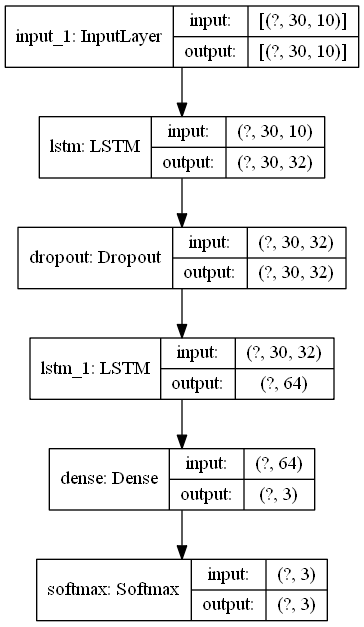

In [30]:
tf.keras.utils.plot_model(model, 'logs/main/lstm_model.png', show_shapes=True, expand_nested=True)


We use TensorFlow's Dataset API to feed data to the model (not necessary).

In [31]:
batch_size=128

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().repeat().batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size).repeat()


Run TensorBoard (TensorFlow's visualization toolkit) in Jupyter to monitor progress of training in realtime.

<font color = red>You may have to run the code cell below twice due to an [existing bug](https://github.com/tensorflow/tensorboard/issues/2483) as of TensorFlow 2.3</font>. The first time will result in a timeout error. The second time should work, or you get the error message "localhost refused to connect" (usually because TensorBoard doesn't properly clean up after itself on Windows), in which case, you may consider trying a different port number.


In [32]:
%load_ext tensorboard
%tensorboard --logdir "logs/main/tensorboard_events" --port=8004
# tb.notebook.display(port=8008, height=1000)

Reusing TensorBoard on port 8004 (pid 2844), started 0:01:56 ago. (Use '!kill 2844' to kill it.)

In [33]:
epochs=50
steps_per_epoch = x_train.shape[0]//batch_size # batches per epoch.
validation_steps = 5

history = model.fit(train_data, validation_data=test_data, epochs=epochs, callbacks=all_callbacks,
                    steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)


Train for 58 steps, validate for 5 steps
Epoch 1/50
57/58 [============================>.] - ETA: 0s - loss: 0.7962 - categorical_crossentropy: 0.7962 - categorical_accuracy: 0.6255
Epoch 00001: val_loss improved from inf to 0.64318, saving model to logs\main\model_checkpoints\1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: logs\main\model_checkpoints\1\assets
58/58 [==============================] - 18s 319ms/step - loss: 0.7937 - categorical_crossentropy: 0.7937 - categorical_accuracy: 0.6269 - val_loss: 0.6432 - val_categorical_crossentropy: 0.6432 - val_categorical_accuracy: 0.7219
Epoch 2/50
57/58 [============================>.] - ETA: 0s - loss: 0.6157 - categorical_crossentropy: 0.6157 - categorical_accuracy: 0.7296
Epoch 00002: val_loss improved from 0.64318 to 0.54379, saving model to logs\main\model_checkpoints\2
INFO:tensorflow:Assets written to: logs\main\model_checkpoints\2\assets
58/58 [===============

58/58 [==============================] - 15s 257ms/step - loss: 0.1063 - categorical_crossentropy: 0.1063 - categorical_accuracy: 0.9665 - val_loss: 0.0988 - val_categorical_crossentropy: 0.0988 - val_categorical_accuracy: 0.9719
Epoch 16/50
57/58 [============================>.] - ETA: 0s - loss: 0.0948 - categorical_crossentropy: 0.0948 - categorical_accuracy: 0.9670
Epoch 00016: val_loss improved from 0.09883 to 0.07850, saving model to logs\main\model_checkpoints\16
INFO:tensorflow:Assets written to: logs\main\model_checkpoints\16\assets
58/58 [==============================] - 15s 252ms/step - loss: 0.0949 - categorical_crossentropy: 0.0949 - categorical_accuracy: 0.9667 - val_loss: 0.0785 - val_categorical_crossentropy: 0.0785 - val_categorical_accuracy: 0.9750
Epoch 17/50
57/58 [============================>.] - ETA: 0s - loss: 0.0834 - categorical_crossentropy: 0.0834 - categorical_accuracy: 0.9720
Epoch 00017: val_loss did not improve from 0.07850
58/58 [======================

Epoch 33/50
57/58 [============================>.] - ETA: 0s - loss: 0.0536 - categorical_crossentropy: 0.0536 - categorical_accuracy: 0.9838
Epoch 00033: val_loss did not improve from 0.01939
58/58 [==============================] - 3s 59ms/step - loss: 0.0531 - categorical_crossentropy: 0.0531 - categorical_accuracy: 0.9840 - val_loss: 0.0304 - val_categorical_crossentropy: 0.0304 - val_categorical_accuracy: 0.9891
Epoch 34/50
57/58 [============================>.] - ETA: 0s - loss: 0.0325 - categorical_crossentropy: 0.0325 - categorical_accuracy: 0.9888
Epoch 00034: val_loss improved from 0.01939 to 0.01569, saving model to logs\main\model_checkpoints\34
INFO:tensorflow:Assets written to: logs\main\model_checkpoints\34\assets
58/58 [==============================] - 14s 245ms/step - loss: 0.0327 - categorical_crossentropy: 0.0327 - categorical_accuracy: 0.9886 - val_loss: 0.0157 - val_categorical_crossentropy: 0.0157 - val_categorical_accuracy: 0.9969
Epoch 35/50
57/58 [============

57/58 [============================>.] - ETA: 0s - loss: 0.0181 - categorical_crossentropy: 0.0181 - categorical_accuracy: 0.9944- ETA: 0s - loss: 0.0165 - categorical_crossentropy: 0.0165 - categorical_accuracy: 
Epoch 00050: val_loss did not improve from 0.00544
58/58 [==============================] - 3s 60ms/step - loss: 0.0208 - categorical_crossentropy: 0.0208 - categorical_accuracy: 0.9938 - val_loss: 0.0370 - val_categorical_crossentropy: 0.0370 - val_categorical_accuracy: 0.9875


# Further experiments

## Only sensor signals (no temperature or humidity)

Let's train without temperature or humidity as a feature. So, we drop the last two features.

We should expect this to produce perfomance that is comparable to the earlier model we trained above, but a little weaker if at all.

In [34]:

input_layer_tensor = tf.keras.Input(shape=x[:,:,:-2].shape[1:])
output = tf.keras.layers.LSTM(32, return_sequences=True)(input_layer_tensor)
output = tf.keras.layers.Dropout(0.3)(output)
output = tf.keras.layers.LSTM(64, return_sequences=False)(output)
output = tf.keras.layers.Dense(3)(output)
output_layer_tensor = tf.keras.layers.Softmax()(output)

model = tf.keras.Model(input_layer_tensor, output_layer_tensor)

#callback for TensorBoard.

tensorboard_logdir=os.path.join("logs","sensor_only","tensorboard_events")

all_callbacks.append(
    tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logdir,
                                   histogram_freq=1,
                                   write_graph=False, profile_batch = 0))

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.85, 
                                   beta_2=0.95, epsilon=1e-07, amsgrad=False)
loss= tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalCrossentropy(), tf.keras.metrics.CategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

batch_size=128

train_data = tf.data.Dataset.from_tensor_slices((x_train[:,:,:-2], y_train))
train_data = train_data.cache().repeat().batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices((x_test[:,:,:-2], y_test))
test_data = test_data.batch(batch_size).repeat()

epochs=50
steps_per_epoch = x_train.shape[0]//batch_size # batches per epoch.
validation_steps = 5

history = model.fit(train_data, validation_data=test_data, epochs=epochs,
                    steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Train for 58 steps, validate for 5 steps
Epoch 1/50
58/58 [==============================] - 12s 200ms/step - loss: 0.8307 - categorical_crossentropy: 0.8307 - categorical_accuracy: 0.5870 - val_loss: 0.6483 - val_categorical_crossentropy: 0.6483 - val_categorical_accuracy: 0.6953
Epoch 2/50
58/58 [==============================] - 4s 76ms/step - loss: 0.6210 - categorical_crossentropy: 0.6210 - categorical_accuracy: 0.7244 - val_loss: 0.5729 - val_categorical_crossentropy: 0.5729 - val_categorical_accuracy: 0.7609
Epoch 3/50
58/58 [==============================] - 4s 62ms/step - loss: 0.5193 - categorical_crossentropy: 0.5193 - categorical_accuracy: 0.7955 - val_loss: 0.5196 - val_categorical_crossentropy: 0.5196 - val_categorical_accuracy: 0.8078
Epoch 4/50
58/58 [==============================] - 4s 63ms/step - loss: 0.4435 - categorical_crossentropy: 0.4435 - categorical_accuracy: 0.8287 - val_loss: 0.3723 - val_categorical_crossentropy: 0.3723 - val_categorical_accuracy: 0.8562
E

58/58 [==============================] - 4s 62ms/step - loss: 0.0823 - categorical_crossentropy: 0.0823 - categorical_accuracy: 0.9731 - val_loss: 0.0856 - val_categorical_crossentropy: 0.0856 - val_categorical_accuracy: 0.9672
Epoch 35/50
58/58 [==============================] - 4s 62ms/step - loss: 0.0673 - categorical_crossentropy: 0.0673 - categorical_accuracy: 0.9774 - val_loss: 0.0405 - val_categorical_crossentropy: 0.0405 - val_categorical_accuracy: 0.9891
Epoch 36/50
58/58 [==============================] - 4s 62ms/step - loss: 0.0671 - categorical_crossentropy: 0.0671 - categorical_accuracy: 0.9780 - val_loss: 0.0621 - val_categorical_crossentropy: 0.0621 - val_categorical_accuracy: 0.9750
Epoch 37/50
58/58 [==============================] - 4s 66ms/step - loss: 0.0667 - categorical_crossentropy: 0.0667 - categorical_accuracy: 0.9780 - val_loss: 0.0355 - val_categorical_crossentropy: 0.0355 - val_categorical_accuracy: 0.9937
Epoch 38/50
58/58 [==============================] -

## Only temperature and humidity

Let's use only temperature and humidity as input features. This is expected to significantly underperform.

In [35]:
input_layer_tensor = tf.keras.Input(shape=x[:,:,-2:].shape[1:])
output = tf.keras.layers.LSTM(32, return_sequences=True)(input_layer_tensor)
output = tf.keras.layers.Dropout(0.3)(output)
output = tf.keras.layers.LSTM(64, return_sequences=False)(output)
output = tf.keras.layers.Dense(3)(output)
output_layer_tensor = tf.keras.layers.Softmax()(output)

model = tf.keras.Model(input_layer_tensor, output_layer_tensor)

#callback for TensorBoard.

tensorboard_logdir=os.path.join("logs","temp_hum_only","tensorboard_events")

all_callbacks.append(
    tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logdir,
                                   histogram_freq=1,
                                   write_graph=False, profile_batch = 0))

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.85, 
                                   beta_2=0.95, epsilon=1e-07, amsgrad=False)
loss= tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalCrossentropy(), tf.keras.metrics.CategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

batch_size=128

train_data = tf.data.Dataset.from_tensor_slices((x_train[:,:,-2:], y_train))
train_data = train_data.cache().repeat().batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices((x_test[:,:,-2:], y_test))
test_data = test_data.batch(batch_size).repeat()

epochs=50
steps_per_epoch = x_train.shape[0]//batch_size # batches per epoch.
validation_steps = 5

history = model.fit(train_data, validation_data=test_data, epochs=epochs,
                    steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Train for 58 steps, validate for 5 steps
Epoch 1/50
58/58 [==============================] - 8s 136ms/step - loss: 1.0439 - categorical_crossentropy: 1.0439 - categorical_accuracy: 0.4683 - val_loss: 1.0362 - val_categorical_crossentropy: 1.0362 - val_categorical_accuracy: 0.4859
Epoch 2/50
58/58 [==============================] - 4s 63ms/step - loss: 1.0055 - categorical_crossentropy: 1.0055 - categorical_accuracy: 0.5081 - val_loss: 1.0299 - val_categorical_crossentropy: 1.0299 - val_categorical_accuracy: 0.5063
Epoch 3/50
58/58 [==============================] - 4s 62ms/step - loss: 0.9838 - categorical_crossentropy: 0.9838 - categorical_accuracy: 0.5065 - val_loss: 1.0234 - val_categorical_crossentropy: 1.0234 - val_categorical_accuracy: 0.5063
Epoch 4/50
58/58 [==============================] - 4s 63ms/step - loss: 0.9509 - categorical_crossentropy: 0.9509 - categorical_accuracy: 0.5120 - val_loss: 0.9787 - val_categorical_crossentropy: 0.9787 - val_categorical_accuracy: 0.4531
Ep

58/58 [==============================] - 4s 62ms/step - loss: 0.6471 - categorical_crossentropy: 0.6471 - categorical_accuracy: 0.6969 - val_loss: 0.6328 - val_categorical_crossentropy: 0.6328 - val_categorical_accuracy: 0.7125
Epoch 35/50
58/58 [==============================] - 4s 62ms/step - loss: 0.6495 - categorical_crossentropy: 0.6495 - categorical_accuracy: 0.7003 - val_loss: 0.6926 - val_categorical_crossentropy: 0.6926 - val_categorical_accuracy: 0.6906
Epoch 36/50
58/58 [==============================] - 4s 65ms/step - loss: 0.6274 - categorical_crossentropy: 0.6274 - categorical_accuracy: 0.7069 - val_loss: 0.6014 - val_categorical_crossentropy: 0.6014 - val_categorical_accuracy: 0.7172
Epoch 37/50
58/58 [==============================] - 4s 64ms/step - loss: 0.6150 - categorical_crossentropy: 0.6150 - categorical_accuracy: 0.7166 - val_loss: 0.6110 - val_categorical_crossentropy: 0.6110 - val_categorical_accuracy: 0.7344
Epoch 38/50
58/58 [==============================] -

## Non-equidistant dataset

The reason we insisted on using equidistant input data to the LSTM model is so that the meaning associated with the position of each element of a sequence is the same in all sequences. But what would happen if we don't bother.

Let's increase the maximum allowable gap to 120 seconds. That is, a contiguous span could have gaps as big as 120 seconds. We maintain resampling at periodicity of 20 seconds, but without enforcing contiguity in the resampled result. So we will still end up with a resample dataset with big time gaps. To make up for that, we will include time as a feature, but with the start time of each sequence tared to 0. That way, the time the network sees is the time transpired for each given sequence.

In [36]:
largest_acceptable_gap=120
all_contiguous_spans = explore.get_all_contiguous_spans(active_data, largest_acceptable_gap)

resampled_periodicity = 20
duration_seq = 600
seq_len=duration_seq//resampled_periodicity

# OR:
# seq_len=30
# duration_seq = seq_len * resampled_periodicity

all_resampled_suitable_spans = dict()

all_ids = active_data.loc[:, "id"].unique()
for i, id_ in enumerate(all_ids):
    # isolate a single stretch of active exposure to stimuli.
    mask_id = (active_data["id"]==id_)
    active_stimulation = active_data.loc[mask_id, :]
     
    # Get the start indices of all suitable contiguous spans.
    # Suitable spans are those that can produce at least one sequence.
    
    mask_suitable_spans = (all_contiguous_spans["id"]==id_) & \
        (all_contiguous_spans["duration"]>duration_seq)
    
    suitable_spans_range_ind = all_contiguous_spans.loc[mask_suitable_spans.to_numpy(), 
                                                        ["start_index", "end_index"]]
    
    # resample each suitable contiguous span.
    
    all_resampled_suitable_spans[id_] = list()
    for start_ind, end_ind in suitable_spans_range_ind.itertuples(index=False):
        suitable_span = active_stimulation.loc[start_ind:end_ind, :]

        resampled_suitable_span, _ = prepare.segment_and_resample(suitable_span.to_numpy(), 
                                            resampled_periodicity, 
                                            index_time_field=suitable_span.columns.get_loc("time"),
                                            enforce_contiguity=False)
        
        all_resampled_suitable_spans[id_].append(resampled_suitable_span)

In [37]:
# fold all the suitable resampled spans into the required shape for training.

all_folded_spans=[]
all_onehots=[]

onehot_encoder = preprocessing.OneHotEncoder()
onehot_encoder.fit(raw_metadata["class"].unique().reshape(-1, 1))

for id_ in all_resampled_suitable_spans.keys():
    time_field_ind = 0
    for resampled_suitable_span in all_resampled_suitable_spans[id_]:
        # drop the id column.
        temp = np.delete(resampled_suitable_span, [0], axis = 1)
        folded_span = prepare.fold_into_overlapping_sequences(temp,
                                        seq_len, 
                                        fields_to_zero_tare = [None, 0])
        
        stimulation_class_mask = (raw_metadata["id"]==id_)
        stimulation_class = raw_metadata.loc[stimulation_class_mask, "class"]
        stim_classes = np.repeat(stimulation_class.to_numpy(), folded_span.shape[0]).reshape(-1, 1)
        all_folded_spans.append(folded_span)

        all_onehots.append(onehot_encoder.transform(stim_classes).toarray())

x = np.concatenate(all_folded_spans)
y = np.concatenate(all_onehots)

train_size=0.8
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x, y, train_size=train_size, shuffle=True, random_state=77)

In [38]:
input_layer_tensor = tf.keras.Input(shape=x.shape[1:])
output = tf.keras.layers.LSTM(32, return_sequences=True)(input_layer_tensor)
output = tf.keras.layers.Dropout(0.3)(output)
output = tf.keras.layers.LSTM(64, return_sequences=False)(output)
output = tf.keras.layers.Dense(3)(output)
output_layer_tensor = tf.keras.layers.Softmax()(output)

model = tf.keras.Model(input_layer_tensor, output_layer_tensor)

#callback for TensorBoard.

tensorboard_logdir=os.path.join("logs", "messy","tensorboard_events")

all_callbacks.append(
    tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logdir,
                                   histogram_freq=1,
                                   write_graph=False, profile_batch = 0))

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.85, 
                                   beta_2=0.95, epsilon=1e-07, amsgrad=False)
loss= tf.keras.losses.CategoricalCrossentropy()
metrics=[tf.keras.metrics.CategoricalCrossentropy(), tf.keras.metrics.CategoricalAccuracy()]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

batch_size=128

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().repeat().batch(batch_size)

test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size).repeat()

epochs=50
steps_per_epoch = x_train.shape[0]//batch_size # batches per epoch.
validation_steps = 5

history = model.fit(train_data, validation_data=test_data, epochs=epochs,
                    steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Train for 58 steps, validate for 5 steps
Epoch 1/20
58/58 [==============================] - 8s 141ms/step - loss: 1.0159 - categorical_crossentropy: 1.0159 - categorical_accuracy: 0.4809 - val_loss: 0.8055 - val_categorical_crossentropy: 0.8055 - val_categorical_accuracy: 0.6266
Epoch 2/20
58/58 [==============================] - 4s 64ms/step - loss: 0.8331 - categorical_crossentropy: 0.8331 - categorical_accuracy: 0.5933 - val_loss: 0.7483 - val_categorical_crossentropy: 0.7483 - val_categorical_accuracy: 0.6703
Epoch 3/20
58/58 [==============================] - 4s 64ms/step - loss: 0.7768 - categorical_crossentropy: 0.7768 - categorical_accuracy: 0.6212 - val_loss: 0.7300 - val_categorical_crossentropy: 0.7300 - val_categorical_accuracy: 0.6469
Epoch 4/20
58/58 [==============================] - 4s 65ms/step - loss: 0.7595 - categorical_crossentropy: 0.7595 - categorical_accuracy: 0.6289 - val_loss: 0.7471 - val_categorical_crossentropy: 0.7471 - val_categorical_accuracy: 0.6422
Ep